## Final Project Submission

Please fill out:
* Student name: Susan Warigia
* Student pace: Full time
* Scheduled project review date/time: 17/04/2023 - 21/04/2023
* Instructor name: Nikita Njoroge


### TItle: Predicting Home Sale Prices in King County, USA

**Explanation**
> * This project aims to predict the sale price of homes in King County, USA, based on various features such as the number of bedrooms, bathrooms, square footage, and location. The goal is to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

### Overview
This projects aims to analyze factors affecting house price in King County. Some of these factors are; location, year of construction, size, renovations done and many more. This would greatly help the agency get insights on how to cut down the costs and maximize the profit. 

### Business Problem
Our stakeholder is homeowners who are looking to renovate their homes and want to estimate the impact of these renovations on the value of their home. Our business problem is to identify which home features are most important in determining a home's sale price and estimate how much value can be added by improving these features.

In [1]:
# Import the required libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
plt.style.use('ggplot')

### Load the dataset into a data frame

In [2]:
# load the data into a data frame
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
rows, columns = df.shape
print(f'Nrows: {rows}, Ncolumns: {columns}')


Nrows: 21597, Ncolumns: 21


In [4]:
cols = df.columns
cols

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Data Understanding
The data used in this project is the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder. The dataset contains 21,597 records and 21 columns. The description of the column names can be found in column_names.md in the same folder. It contains 21 columns with each being either numerical or categorical data.

### Data processing
We will start by cleaning the data and handling missing values, if any. We will also convert some of the columns into the appropriate data type.

In [5]:
def missing_values(data):

    # Columns with null values
    null_cols = data.columns[data.isna().any()]

    # Count null values in each column and sort in descending order
    count_null = data[null_cols].isna().sum().sort_values(ascending=False)

    # print the null column and the count
    for col, count in zip(null_cols, count_null):
        print(f'The {col} has {round(count/len(data)*100, 2)} % of the data missing')

missing_values(df)

The waterfront has 17.79 % of the data missing
The view has 11.0 % of the data missing
The yr_renovated has 0.29 % of the data missing


In [6]:
def duplicates(data=df, unique_id = 'id'):
    # Check for duplicates
    duplicates = data[unique_id].duplicated().sum()
    # duplicates = df.id.duplicated().sum()
    print(f'The duplicated values are: {duplicates}')
    print(f'Which translates into {round(duplicates/len(data) * 100, 2)}% of the total data.')

    # Drop duplicated values:
    data.drop_duplicates(subset=unique_id, keep='last', inplace=True)

duplicates(df, 'id')



The duplicated values are: 177
Which translates into 0.82% of the total data.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     19067 non-null  object 
 9   view           21357 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  object 
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   17607 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

**Dealing with the date columns**
* To be able to use the date columns we have to convert them into either and int or a datetime data type. The ```date``` column has been converted into ```datetime``` using the ```pd.datetime()``` function. The ```yr_renovated``` column which might be of help has been converted to datatype ```int```

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['yr_renovated'] = df['yr_renovated'].fillna(0).astype(int)


In [9]:
df['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

### Data Analysis
To get most out of our data, we can begin by exploring a few distribution plots. For example, for our target variable ```price```

In [10]:
df_numeric = df.select_dtypes(include=np.number)
df_numeric.head(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,1933,0,98028,47.7379,-122.233,2720,8062


**Categorical Variables**

In [11]:
df_categorical = df.select_dtypes(include=np.object_)
df_categorical

,waterfront,view,condition,grade,sqft_basement
0,NaN,NONE,Average,7 Average,0.0
1,NO,NONE,Average,7 Average,400.0
2,NO,NONE,Average,6 Low Average,0.0
3,NO,NONE,Very Good,7 Average,910.0
4,NO,NONE,Average,8 Good,0.0
...,...,...,...,...,...
21592,NO,NONE,Average,8 Good,0.0
21593,NO,NONE,Average,8 Good,0.0
21594,NO,NONE,Average,7 Average,0.0
21595,NaN,NONE,Average,8 Good,0.0


### Data Analysis
We can start by having a look at the summary statistics of all the numerical variables. The ```describe()``` function in pandas enables us implement this concent easily.

In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.418614e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,1791.170215,1971.092997,68.956723,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.675569e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,828.692965,29.387141,364.552298,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1200.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,2220.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


**Interpretation**
* The ```describe()``` method used above gives us a summary table of all our continuous variables. From the table we can see the measures of central tendency like the mean, mode, mdeian and quartiles of various variables. We can also see the variability of the data by observing the standard deviations and the range

### Group our df in respect to grade


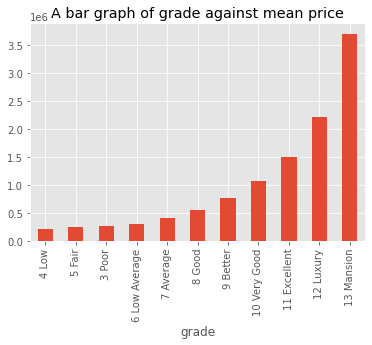

In [13]:
def plot_variable(column):
    grp = df.groupby(column)['price'].mean().sort_values(ascending=True)
    grp.plot(kind='bar', title = 'A bar graph of ' + column + ' against mean price')
    
plot_variable('grade')

> * We can see that average prices for the houses differ depending on grade. In the above plot we can see that houses that had the highest average prices are Average, Good, Better in that order. The least being the one with poor grade.

**How does condition of a house affect house price?**

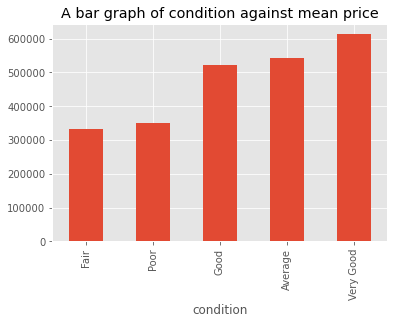

In [14]:
plot_variable('condition')

* From observation, we can clearly see that the house price increases as the condition of the house improves. Houses with ```Very Good``` condition have the highest average price.

**How view affects house price?**

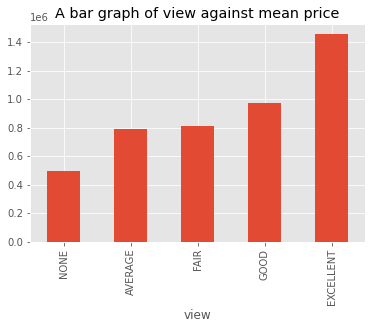

In [15]:
plot_variable('view')

* We can see from the above bar graph that houses with excellent view had the highest average sale price. 
* The better the view the higher the price.

**How does waterfront affect house price?**

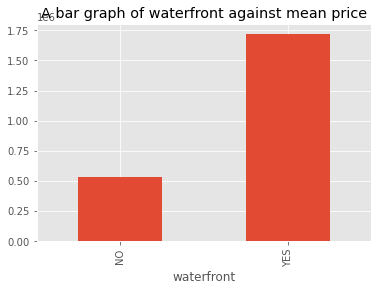

In [16]:
plot_variable('waterfront')

### Distribution analysis and plots

To be able to understand our data well and build reliable models, we need to study the distribution patterns of different variables in our dataset. This will enable us identify the most appropriate tests to use to accurately make informed decsisions.

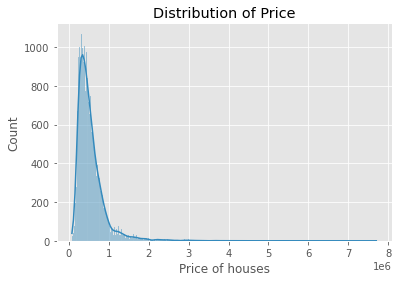

In [17]:
#plot the distribution of the target variable
sns.histplot(df.price, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price of houses')
plt.ylabel('Count')
plt.show()

**Interpretions**
* The price distribution is positively skewed, which means there are more houses with lower price than higher price. 


### Skewness


In [18]:
sk = df.select_dtypes(include=np.number).skew().sort_values(ascending=False)
sk_res = pd.DataFrame({'Columns':sk.index, 'skewness':sk.values})
for col, value in zip(sk_res['Columns'],sk_res['skewness']):
    if (value <= -1) or (value >= 1):
        print('The column below is highly skewed.')
        print(f'{col} : {value}')
        print()
    if (-0.5 > value > -1) or (0.5 < value < 1):
        print('The column below is moderately skewed.')
        print(f'{col} : {value}')
        print()
    if (0.5 > value > -0.5):
        print('The column below is approximately symmetric.')
        print(f'{col} : {value}')
        print()

The column below is highly skewed.
sqft_lot : 13.056251852883626

The column below is highly skewed.
sqft_lot15 : 9.513044564095368

The column below is highly skewed.
yr_renovated : 5.098099221916137

The column below is highly skewed.
price : 4.035378874466087

The column below is highly skewed.
bedrooms : 2.0399818162187944

The column below is highly skewed.
sqft_living : 1.4727019951483347

The column below is highly skewed.
sqft_above : 1.4450007970330156

The column below is highly skewed.
sqft_living15 : 1.1045308883004101

The column below is moderately skewed.
long : 0.8817548805770775

The column below is moderately skewed.
floors : 0.6087875250982765

The column below is moderately skewed.
bathrooms : 0.5188980554943093

The column below is approximately symmetric.
zipcode : 0.4077889666043932

The column below is approximately symmetric.
id : 0.24312735775575572

The column below is approximately symmetric.
yr_built : -0.47422199328416514

The column below is approximately

In [19]:
transformed = np.log(df['price'])

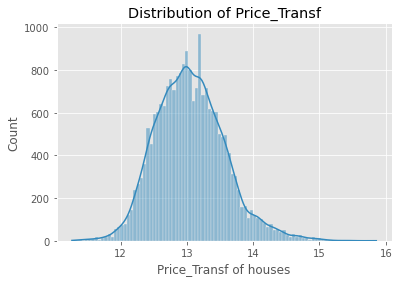

In [20]:
sns.histplot(transformed, kde=True)
plt.title('Distribution of Price_Transf')
plt.xlabel('Price_Transf of houses')
plt.ylabel('Count')
plt.show()

**Correlation Matrix Plot**

In order to examine the correlation between the numeric variables and the target variable-price, we found it useful to display the information using a correlation heatmap.

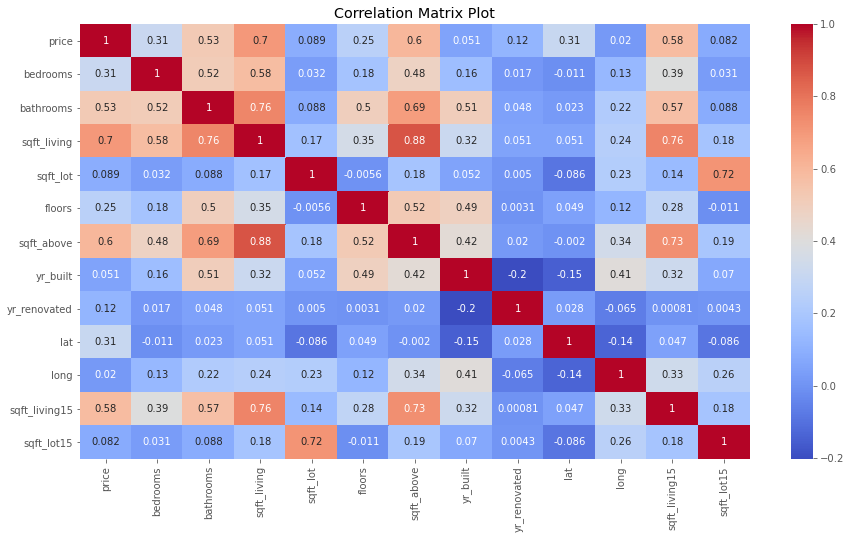

In [25]:
df_corr = df.drop(['id','zipcode'], axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Plot')
plt.show()

**Interpretation**
* From the above correlation matrix plot, We can see that numerical variables that have a higher correlation with price are; ```sqft_living```, ```sqft_above```, ```sqft_living15```,```bathrooms```, and  ```bedrooms```.
* We can also see that the variables with a weak positive correletion to price are ```sqft_lot```, ```sqft_lot15```, and ```yr_built```.

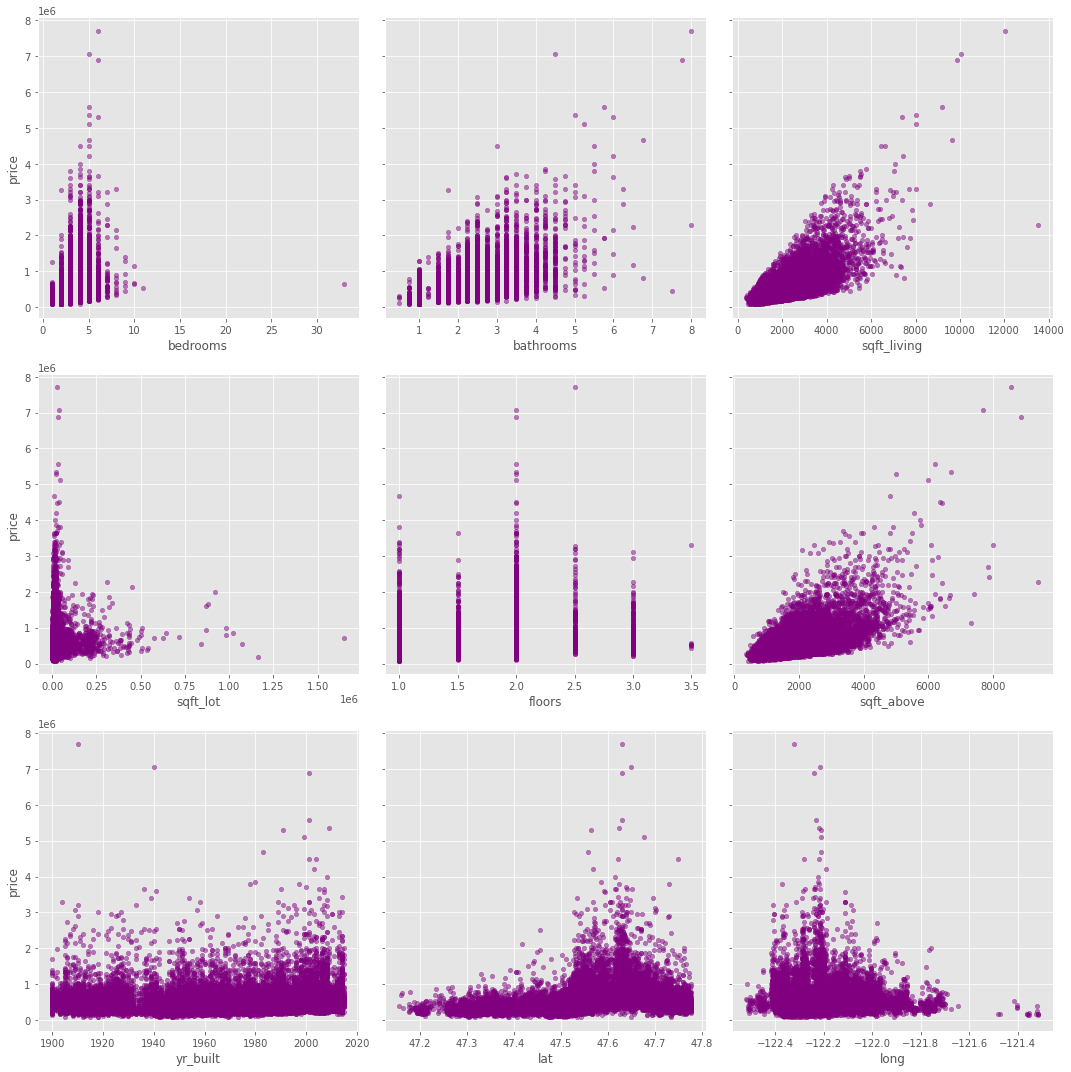

In [26]:
# plotting multiple scatter plots of the various variables

fig = plt.figure(figsize=(18,10))

axes = fig.subplots(nrows=3, ncols=3, sharey=True)

# defining a function to plot multiple scatter plots of the various variables
def multiple_scatterplot(data, columns):
    for xcol, ax in zip(columns, axes.flatten()):
        data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.5, color='purple', figsize=(15,15))

multiple_scatterplot(df, columns = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors','sqft_above', 'yr_built', 'lat', 'long'])
    
plt.tight_layout()
plt.show()

### Simple Linear Regression
We can perform a regression analysis for the variable that had the highest correlation.


**Using stats models**

In [27]:
#function to perform regression
def model(data, y, x):
    formula = y + '~' + x
    results = smf.ols(formula, data).fit()
    results.
    return print(results.summary())


SyntaxError: invalid syntax (<ipython-input-27-c8f984145e13>, line 5)

In [ ]:
model(df, 'price', 'sqft_living')


In [ ]:
mse = np.mean((y_pred - y_actual) ** 2)

In [ ]:
model(df, 'price', 'sqft_living').params

**using sklearn**

In [ ]:
X = df[['sqft_living']]
Y = df['price']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=1234)

#fitting the train dataset into model
linear_reg_model = LinearRegression().fit(x_train, y_train)

pred_results_linear =linear_reg_model.predict(x_test)
pred_results_linear

In [ ]:
print(f'The coefficient is: {linear_reg_model.coef_}')
print(f'The Intercept is: {linear_reg_model.intercept_}')

* Using these predictions, we can check the accuracy of the model:


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print('R_squared score is:', r2_score(pred_results_linear, y_test))
print('MSE is:', mean_squared_error(pred_results_linear, y_test))


In [ ]:
def model(data, y, x):
    '''This function takes three arguments and prints the regressions summary table'''
    # extract the target variable and predictor variable from the data
    X = data[[x]]
    y = data[y]
    
    # create a linear regression object and fit the model
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=1234)

    #fitting the train dataset into model
    model = LinearRegression().fit(x_train, y_train)
    
    # print the regression summary table
    y_pred = model.predict(x_test)
    # calculate the MSE and RMSE
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print()
    # print the regression summary table
    print('Intercept:', model.intercept_)
    print(x + ' coefficient:', model.coef_[0])
    print('R-squared:', model.score(X, y))

In [ ]:
model(df, 'price', 'sqft_living')



### Multiple linear regression
We will perform regression analysis on variable that are more likely to be used as the predictor variables for our target variable. This will help us see what effect is produced by a certain change of the predictor variable. To determine which variables are statistical significant we can use the p_value approach where the variables with a p-value greater than 0.05 (if we have considered a confidence interval of 95%) are the unimportant ones and can be removed from the model.

There are also other approches to this. For example, Ridge Lasso or Elastic Net which penalize variables based on their importance in the model.

In [ ]:
# clean the value of X to use by dropping unnecessary columns
df_numeric = df.select_dtypes(include=np.number)
X = df_numeric.drop(['id','price','zipcode','price_transf'], axis=1)
Y = df['price']

#split our dataset into train and test
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=1234)

#Initializing the algorithm and fitting our model
linear_model = LinearRegression().fit(x_train,y_train)

In [ ]:
#Predicting the results
pred_results_multiple =linear_model.predict(x_test)
result_df = pd.DataFrame(data={'price': pred_results_multiple})
result_df

In [ ]:
#Checking the performance
print('R_squared score is:', r2_score(pred_results_multiple, y_test))
print('MSE is:', mean_squared_error(pred_results_multiple, y_test))


In [ ]:
model(df, 'price', 'grade_number')

### Multiple linear regression
We will perform regression analysis on variable that are more likely to be used as the predictor variables for our target variable. This will help us see what effect is produced by a certain change of the predictor variable.

In [ ]:
df.corr()['price'].sort_values(ascending=False)

In [ ]:
model(df, 'price','sqft_living + sqft_above + sqft_living15 + bathrooms + bedrooms + floors + yr_renovated ')

### Project Outline
* Introduction
> * Title
> * Explanation
* Business Problem
* Data Understanding
* Data processing
* Data analysis
> * Statistical tests and distributions
> * Visualizations
* Modeling
> * Linear regression
> * Multiple regression
* Interpretations and Recommendations
* Conclusion